In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("College Club Data.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [5]:
df

,member_id,Full Name,position,phone,zip,event_name,major_name,college,budget.budget_id,Spent,Remaining,Budget,Expense,Income,city,county,state,Date,Month,Year
0,recttfySfQnYb68u3,Annabella Warren,Secretary,727-555-2732,60047,October Speaker,Human Experience Design and Interaction,College of Education & Human Services,recJOc7f9KgpgJm5q,6.00,4.00,10,6.00,50,Lake Zurich,Lake County,Illinois,2019-09-01,September,2019
1,recttfySfQnYb68u3,Annabella Warren,Secretary,727-555-2732,60047,September Speaker,Human Experience Design and Interaction,College of Education & Human Services,rec0QmEc3cSQFQ6V2,67.81,7.19,75,67.81,50,Lake Zurich,Lake County,Illinois,2019-09-01,September,2019
2,recttfySfQnYb68u3,Annabella Warren,Secretary,727-555-2732,60047,October Speaker,Human Experience Design and Interaction,College of Education & Human Services,recZuCiQzCDAs4zDQ,13.45,11.55,25,13.45,50,Lake Zurich,Lake County,Illinois,2019-09-01,September,2019
3,recttfySfQnYb68u3,Annabella Warren,Secretary,727-555-2732,60047,September Speaker,Human Experience Design and Interaction,College of Education & Human Services,rec5V70sIuIgpOzDT,173.06,-23.06,150,59.73,50,Lake Zurich,Lake County,Illinois,2019-09-01,September,2019
4,recttfySfQnYb68u3,Annabella Warren,Secretary,727-555-2732,60047,September Speaker,Human Experience Design and Interaction,College of Education & Human Services,rec5V70sIuIgpOzDT,173.06,-23.06,150,113.33,50,Lake Zurich,Lake County,Illinois,2019-09-01,September,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,recro8T1MPMwRadVH,Elijah Allen,Treasurer,724-555-5721,21784,Yearly Kickoff,Elementary Education,College of Education & Human Services,recca5tkvdQgoLKZz,327.07,22.93,350,195.30,50,Sykesville,Carroll County,Maryland,2020-04-07,April,2020
9156,recro8T1MPMwRadVH,Elijah Allen,Treasurer,724-555-5721,21784,Yearly Kickoff,Elementary Education,College of Education & Human Services,recvKTAWAFKkVNnXQ,122.06,27.94,150,122.06,50,Sykesville,Carroll County,Maryland,2020-04-07,April,2020
9157,recro8T1MPMwRadVH,Elijah Allen,Treasurer,724-555-5721,21784,September Meeting,Elementary Education,College of Education & Human Services,recMc8TbR76rmUSHG,54.25,0.75,55,54.25,50,Sykesville,Carroll County,Maryland,2020-04-07,April,2020
9158,recro8T1MPMwRadVH,Elijah Allen,Treasurer,724-555-5721,21784,September Meeting,Elementary Education,College of Education & Human Services,recwXIiKoBMjXJsGZ,101.94,48.06,150,51.81,50,Sykesville,Carroll County,Maryland,2020-04-07,April,2020


In [6]:
df.isnull().sum()

member_id           0
Full Name           0
position            0
phone               0
zip                 0
event_name          0
major_name          0
college             0
budget.budget_id    0
Spent               0
Remaining           0
Budget              0
Expense             0
Income              0
city                0
county              0
state               0
Date                0
Month               0
Year                0
dtype: int64

In [7]:
df.dtypes

member_id                   object
Full Name                   object
position                    object
phone                       object
zip                          int64
event_name                  object
major_name                  object
college                     object
budget.budget_id            object
Spent                      float64
Remaining                  float64
Budget                       int64
Expense                    float64
Income                       int64
city                        object
county                      object
state                       object
Date                datetime64[ns]
Month                       object
Year                         int32
dtype: object

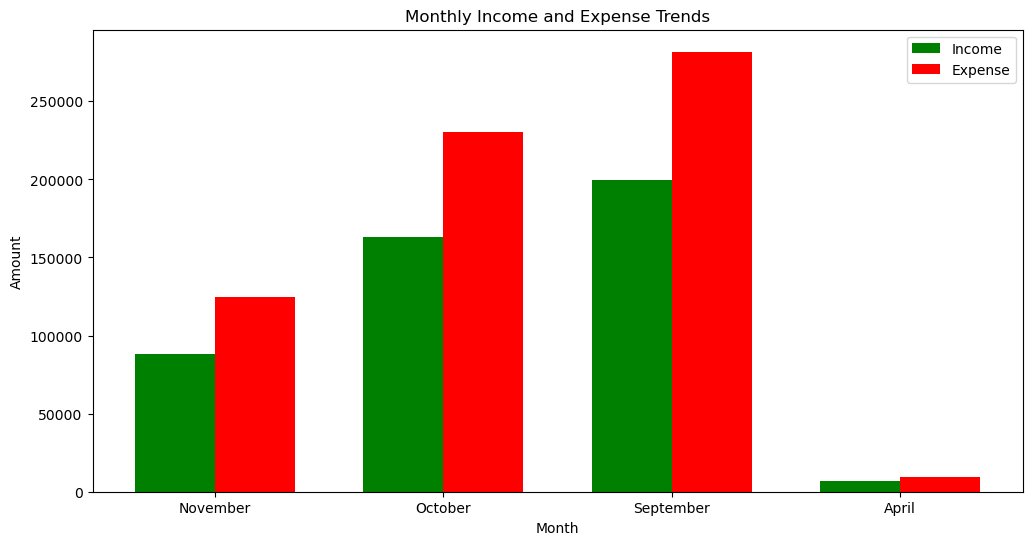

In [32]:

# Creating a bar chart with grouped bars for each month
bar_width = 0.35
monthly_data = df.groupby(['Year', 'Month']).agg({'Income': 'sum', 'Expense': 'sum'}).reset_index()
index = np.arange(len(monthly_data['Month']))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index, monthly_data['Income'], width=0.35,label='Income', color='green')
bar2 = plt.bar(index + bar_width, monthly_data['Expense'], width=0.35,label='Expense', color='red')

plt.title('Monthly Income and Expense Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(index + bar_width / 2, monthly_data['Month'])
plt.legend()

plt.show()  

In [13]:
monthly_data

,Year,Month,Income,Expense
0,2019,November,88200,124630.64
1,2019,October,162950,230647.27
2,2019,September,199900,281769.08
3,2020,April,6950,9723.36


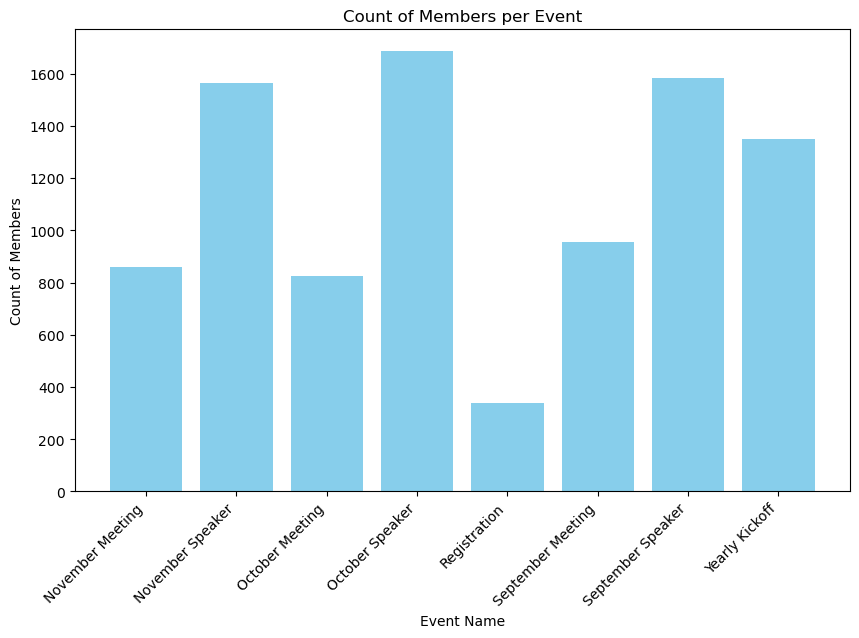

In [27]:

# Group by event_name and calculate the count of member_ids
attendance = df.groupby('event_name')['member_id'].count().reset_index()

plt.subplots(figsize=(10, 6))
plt.bar(attendance['event_name'], attendance['member_id'], color='skyblue')

# Customize the plot
plt.title('Count of Members per Event')
plt.xlabel('Event Name')
plt.ylabel('Count of Members')
plt.xticks(attendance['event_name'], rotation=45, ha='right')
 # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


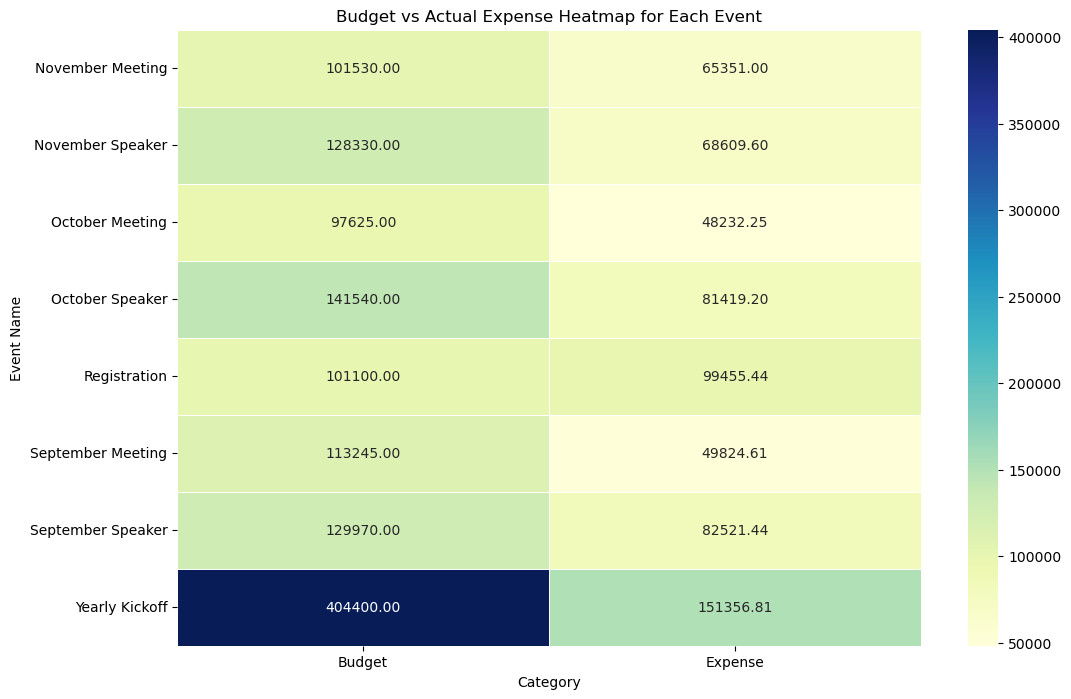

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.pivot_table(index='event_name', values=['Budget', 'Expense'], aggfunc='sum'), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Budget vs Actual Expense Heatmap for Each Event')
plt.xlabel('Category')
plt.ylabel('Event Name')

# Show the plot
plt.show()

In [40]:
income_stats = df['Income'].describe()
expense_stats = df['Expense'].describe()
budget_stats = df['Budget'].describe()

stats_df = pd.DataFrame({
    'Income': income_stats,
    'Expense': expense_stats,
    'Budget': budget_stats
})

print(stats_df)


       Income      Expense       Budget
count  9160.0  9160.000000  9160.000000
mean     50.0    70.608117   132.941048
std       0.0    60.555813   100.667967
min      50.0     6.000000    10.000000
25%      50.0    50.130000    55.000000
50%      50.0    59.730000   150.000000
75%      50.0    74.590000   150.000000
max      50.0   295.120000   350.000000
